# Comparative Analysis
In this notebook, we compare different variations of multivariate ClaSP.

In [1]:
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
import numpy as np
import pandas as pd

pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns

from src.utils import load_has_datasets
from aeon.visualisation import plot_critical_difference
from external.MCM import MCM
from wand.image import Image

sns.set_theme()
sns.set_color_codes()

import os
import sys

sys.path.append("../../")

Let's choose a score for evaluation (F1 or Covering).

In [3]:
eval_score = "covering_score"

Let's load the reference data.

In [4]:
df_data = load_has_datasets()
df_data.head()

,dataset,window_size,change_points,labels,time_series
0,indoor_subject1_routine1 (id125),50,"[1461, 2952, 4473, 5022, 6460]","[1, 0, 1, 2, 0, 3]","[[0.5025029458177382, 0.78151899859646, 0.4075..."
1,indoor_subject1_routine1 (id140),50,"[772, 2056, 3521, 4835, 5283, 6893]","[2, 1, 3, 1, 2, 0, 3]","[[0.41870591057777035, 0.8157450984128195, 0.3..."
2,indoor_subject1_routine1 (id93),50,"[1211, 2043, 2836, 3529, 4036]","[2, 4, 0, 1, 3, 4]","[[0.6809143354242022, 0.8390696507060063, 0.34..."
3,indoor_subject1_routine1 (id52),50,"[739, 1433, 2044, 2875, 3589]","[0, 1, 2, 3, 1, 0]","[[0.5215244935774459, 0.7310931419213416, 0.50..."
4,indoor_subject1_routine1 (id221),50,"[1506, 3033, 4477, 5348, 6805]","[2, 0, 2, 3, 0, 1]","[[0.48401058282315657, 0.6748131355527517, 0.5..."


Let's load the scores from the different methods.

In [5]:
competitors = ["PCA", "DistAvg", "ProfileAvg", "CPWeighting"]
datasets = ["HAS_test"] #    

methods, dfs = list(), list()

for candidate_name in competitors:
    methods.append((candidate_name, f"{candidate_name}.csv.gz"))

for idx, (name, file_name) in enumerate(methods):
    df = []
    
    for d in datasets:
        df.append(pd.read_csv(f"../experiments/competitor/{d}_{file_name}", usecols=["dataset", eval_score], compression="gzip"))
    
    df = pd.concat(df)
    df.sort_values(by="dataset", inplace=True)
    dfs.append((name, df))

df_scores = pd.DataFrame()

for name, df in dfs:
    df_scores["dataset"] = df.dataset
    df_scores[name] = df[eval_score]

# df_sel = df_data[df_data.change_points.map(len) > 1]
# df_scores = df_scores[df_scores.dataset.isin(df_sel.dataset)]

df_scores.reset_index(drop=True, inplace=True)
df_scores

,dataset,PCA,DistAvg,ProfileAvg,CPWeighting
0,indoor_subject1_routine1 (id125),0.802,0.350,0.816,0.724
1,indoor_subject1_routine1 (id52),0.505,0.849,0.779,0.761
2,indoor_subject1_routine1 (id221),0.239,0.841,0.984,0.328
3,indoor_subject4_routine1 (id156),0.304,0.368,0.611,0.984
4,indoor_subject4_routine1 (id13),0.465,0.655,0.448,0.833
5,indoor_subject4_routine3 (id232),0.704,0.635,0.661,0.705
6,indoor_subject4_routine3 (id98),0.569,0.864,0.874,0.583
7,indoor_subject1_routine2 (id27),0.224,0.793,0.825,0.614
8,indoor_subject1_routine2 (id65),0.368,0.467,0.330,0.465
9,indoor_subject1_routine3 (id207),0.919,0.911,0.857,0.645


Let's calculate the mean/median/std score.

In [6]:
df_scores.iloc[:,1:].mean(axis=0).sort_values(ascending=False).round(3)

DistAvg        0.732
CPWeighting    0.716
ProfileAvg     0.707
PCA            0.658
dtype: float64

In [7]:
df_scores.iloc[:,1:].median(axis=0).sort_values(ascending=False).round(3)

DistAvg        0.766
ProfileAvg     0.748
CPWeighting    0.746
PCA            0.649
dtype: float64

In [8]:
df_scores.iloc[:,1:].std(axis=0).sort_values().round(3)

DistAvg        0.201
CPWeighting    0.214
ProfileAvg     0.222
PCA            0.245
dtype: float64

Let's compute the wins per method.

In [9]:
ranks = df_scores.iloc[:,1:].rank(1, method='min', ascending=False)
means = np.array(ranks.mean(axis=0))
args = np.argsort(means)

In [10]:
for mean, name in zip(means[args], df_scores.columns[1:].to_numpy()[args]):
    print(f"{name}:wins={ranks[ranks[name] == 1].shape[0]} rank={np.round(mean, 1)}")

DistAvg:wins=51 rank=2.0
ProfileAvg:wins=34 rank=2.3
CPWeighting:wins=42 rank=2.5
PCA:wins=35 rank=2.5


Let's plot the CD diagram.

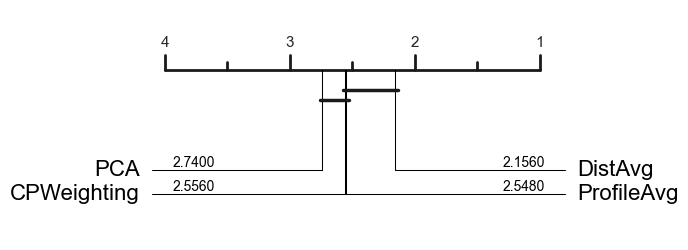

In [11]:
ax = plot_critical_difference(
    scores=df_scores.iloc[:, 1:].to_numpy(),
    labels=df_scores.columns[1:].to_numpy(),
    correction="holm",
    alpha=0.05,
)

plt.savefig("../figures/cd_segmentation_comparative.pdf", bbox_inches="tight")

 Let's plot the MCM.

Processing CPWeighting, ProfileAvg:   0%|          | 0/4 [00:00<?, ?it/s]


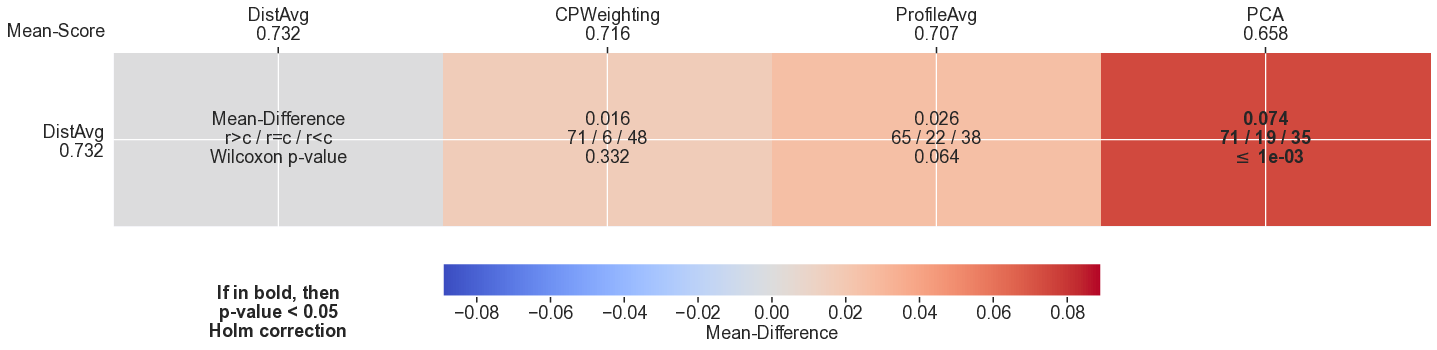

In [12]:
dir_path = "../figures/"
file_name = "mcm_segmentation_comparative"

MCM.compare(
    output_dir=dir_path,
    used_statistic="Score",
    save_as_json=False,
    df_results=df_scores.iloc[:, 1:],
    pdf_savename=file_name,
    load_analysis=False,
    pvalue_correction="Holm",
    row_comparates=("DistAvg",),
    fig_size=(20,5),
    font_size=18,
    precision=3
)
Image(filename=os.path.join(dir_path, file_name + ".pdf"))

Let's compute wins/losses against DistAvg.

In [13]:
selection = "DistAvg"

for rival in df_scores.columns[1:]:
    if rival == selection: continue

    df_pair = df_scores[[selection, rival]]
    pair_ranks = df_pair.rank(1, method='min', ascending=False)

    wins = pair_ranks[(pair_ranks[selection] == 1) & (pair_ranks[rival] == 2)].shape[0]
    losses = pair_ranks[(pair_ranks[selection] == 2) & (pair_ranks[rival] == 1)].shape[0]
    ties = pair_ranks[(pair_ranks[selection] == 1) & (pair_ranks[rival] == 1)].shape[0]

    assert wins + losses + ties == pair_ranks.shape[0]

    print(f"{selection} vs {rival}: (wins/ties/losses): {wins}/{ties}/{losses}")

DistAvg vs PCA: (wins/ties/losses): 71/19/35
DistAvg vs ProfileAvg: (wins/ties/losses): 65/22/38
DistAvg vs CPWeighting: (wins/ties/losses): 71/6/48


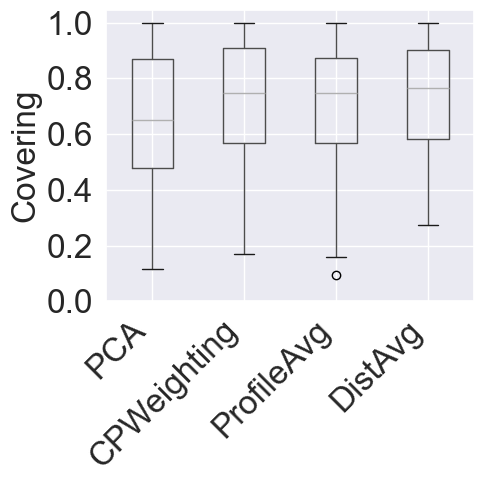

In [14]:
fontsize = 24
_, ax = plt.subplots(figsize=(5, 5))

# sort by median performance
df_sorted_scores = df_scores[df_scores.iloc[:, 1:].median(axis=0).sort_values().index]

df_sorted_scores.boxplot(ax=ax, rot=90)
ax.set_ylabel("Covering", fontsize=fontsize)

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)

for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)

ax.set_xticklabels(df_sorted_scores.columns, rotation=45, ha="right")
ax.set_yticks(np.round(np.arange(0, 1.0 + .2, .2), 1))

plt.savefig(f"../figures/bp_segmentation_comparative.pdf", bbox_inches="tight")